In [1]:
from IPython.display import clear_output

!git clone https://github.com/chester-i-n/11MH-M.git
!unzip 11MH-M/data.zip

clear_output()

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
import os

SENSORS = {'temp': 0, 'pos_x': 1, 'pos_y': 2, 'accel_x': 3, 'accel_y': 4, 'accel_z': 5}



In [3]:
data = np.load('train/0/a5.npy')
print(data.shape)

(3000, 6)


1. Дописать функцию для визуализации с выбором датчиков и длины сигнала. Добавить подпись датчика

In [6]:
# Обращение к ключам словаря
a = {'one': 1, 'two': 2}
print(a['one'])

1


In [ ]:
# Срез массива
a = np.random.randn(10, 3)
print(a)
print(a[:2])

[[-0.96162023 -0.81126114 -0.17163929]
 [ 1.10149     1.37471698 -1.49084571]
 [ 0.31966795 -0.97289133 -0.24190904]
 [ 0.09537214  0.39059447  0.18770037]
 [ 1.18069505  2.54509955 -0.60384786]
 [ 0.9819033   1.10619001  1.32116985]
 [-0.00671301  1.58485761  0.69588348]
 [ 0.98854571 -0.45282423 -0.19689276]
 [-0.443035   -0.01764383 -0.00922815]
 [ 0.81513909 -0.83505566 -1.15693877]]
[[-0.96162023 -0.81126114 -0.17163929]
 [ 1.10149     1.37471698 -1.49084571]]


In [ ]:
# Форматирование строки
a = 1
print(f"Number: {a}")

Number: 1


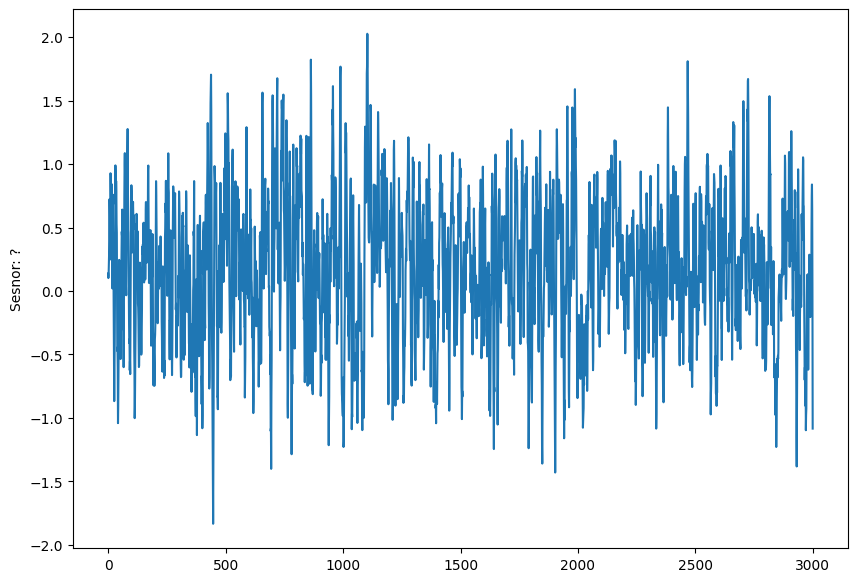

In [5]:
def plot_sensor(data, sensor, length, use_filt=False, filt_length=11, filt_degree=3):
    plt.figure(figsize=(10, 7))
    if use_filt:
        plt.plot(savgol_filter(data[:, 3], filt_length, filt_degree))
    else:
        plt.plot(data[:, 3])
    plt.ylabel('Sesnor: ?')

plot_sensor(data, 'accel_x', 1500, use_filt=True)

2. Дописать расчет среднего значения и стандартного отклонения для всех датчиков.

In [10]:
# Пример использования параметра axis
a = np.random.randn(10, 3)
print(a)
print(a.mean(axis=0))
print(a.std(axis=1))

[[ 0.39106659  0.77900327  0.1045791 ]
 [ 0.74841733  0.19800851  0.75361591]
 [ 1.68080459  0.12852762  0.84101237]
 [ 0.64954833  1.65839504  0.38388101]
 [-0.00880724 -1.45136587  0.04521631]
 [ 0.22180209  0.26391753 -0.44681584]
 [-0.66245087  0.34824617 -1.07626285]
 [ 0.50296648  0.72743801 -0.6268906 ]
 [ 1.26055902 -1.77632456  1.05071511]
 [ 0.75873661  1.15043476  0.57057207]]
[0.55426429 0.20262805 0.15996226]
[0.2763689  0.26069916 0.63442444 0.54901293 0.69311312 0.32557054
 0.59832867 0.59265602 1.38479239 0.24153999]


In [8]:
for i in range(4):
    files = os.listdir(f'train/{i}')
    print(f"Class {i}")
    all_data = []
    for file in files:
        data = np.load(f'train/{i}/{file}')
        all_data.append(data)
    all_data = np.concatenate(all_data, 0)

    boxprops = dict(color="green",linewidth=1.5)
    medianprops = dict(color="green",linewidth=1.5)

    print("Mean value: ")
    print(all_data[:, 0].mean())


Class 0
Mean value: 
1.559709765625
Class 1
Mean value: 
1.5552590087890625
Class 2
Mean value: 
1.5616951009114584
Class 3
Mean value: 
1.5578406249999999


3. Добавить название класса. Сделать боксплоты разного цвета для каждого классса. Для этого сделать словари аналогичный словарю с датчиками. Названия цветов: https://matplotlib.org/stable/gallery/color/named_colors.html

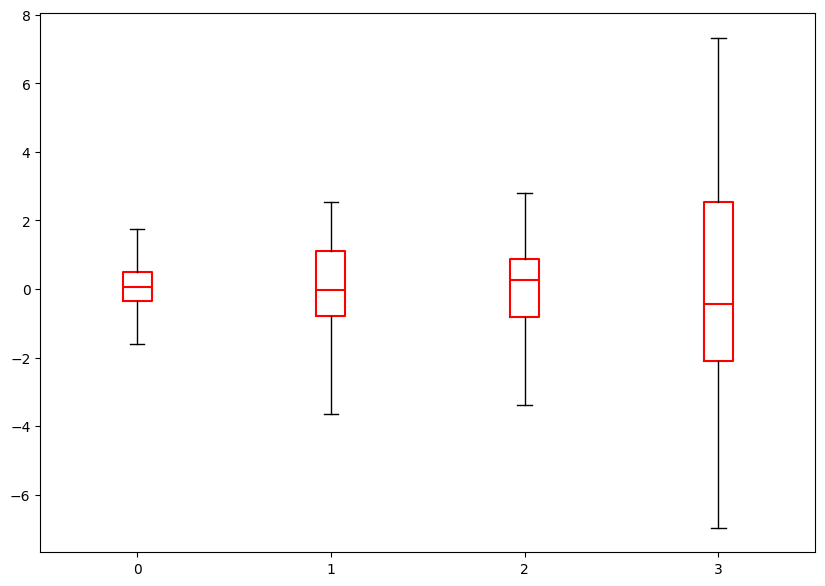

In [15]:
def boxplot(sensor):
    plt.figure(figsize=(10, 7))

    for i in range(4):
        files = os.listdir(f'train/{i}')
        all_data = []
        for file in files:
            data = np.load(f'train/{i}/{file}')
            all_data.append(data)
        all_data = np.concatenate(all_data, 0)

        boxprops = dict(color="red",linewidth=1.5)
        medianprops = dict(color="red",linewidth=1.5)

        plt.boxplot(all_data[:, 4], positions=[i], showfliers=False, labels=[i], boxprops=boxprops,medianprops=medianprops)

    plt.show()

boxplot('temp')